In [1]:
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/GaussFit_spec2D.py

%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

dir_tfCube: /Users/hhg/Research/kinematic_lensing/repo/KLens


In [2]:
data_info = gen_dataInfo_from_tfCube(vcirc=200., redshift=0.2, sini=1.0, slitAngles=[0.], norm=0.)

redshift : 0.2
g1 : 0.0
half_light_radius : 0.5
vcirc : 200.0
sini : 1.0
slitWidth : 0.02
slitAngles : [0.0]


returning:
lambda, observation, model, sky (the last three are (npix, npix, nspax) datacubes)
total tfCube time: 4.5419652462005615 (sec)
total getSlitSpectra time: 1.218674898147583 (sec)


In [3]:
data_info.keys()

dict_keys(['ModelCube', 'ObsCube', 'image', 'image_variance', 'data', 'grid_lambda', 'grid_pos', 'grid_Image', 'par_fid', 'lambda_emit'])

In [4]:
data_info['ModelCube'].shape

(256, 256, 160)

In [5]:
data_info['image']

array([[ 6.8616573e-05, -5.8361828e-05, -1.3293233e-04, ...,
        -1.3346922e-04, -2.8207916e-04, -8.4224201e-05],
       [-2.9031871e-04, -1.8377978e-05,  1.3592685e-04, ...,
         1.7142705e-04, -1.6620022e-04,  2.1697997e-04],
       [ 2.8327000e-04, -6.1775158e-06,  8.5170450e-06, ...,
        -4.4500139e-05, -1.6594169e-04,  1.1626073e-04],
       ...,
       [-3.7884436e-04, -8.6803288e-05,  3.2871819e-04, ...,
        -6.9960406e-05, -2.5066853e-04,  5.2088657e-05],
       [ 1.4608023e-04, -1.8693681e-04, -8.1708617e-07, ...,
        -2.1852144e-04, -1.8166272e-04, -1.4982761e-04],
       [-1.4833441e-05,  1.4199589e-04,  2.3978733e-04, ...,
        -1.1269849e-04, -1.7670268e-04, -2.5062158e-04]], dtype=float32)

In [6]:
GaussFit = GaussFit_spec2D(data_info)

In [7]:
fitted_peakLambda, fitted_amp, fitted_sigma = GaussFit.gaussFit_spec2D(data=GaussFit.data)

model = GaussFit.model_spec2D(fitted_peakLambda,fitted_amp,fitted_sigma)

time cost in gaussFit_spec2D: 0.21223187446594238 (secs)


In [20]:
data = GaussFit.data

In [21]:
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/RotationCurveFit.py
%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/ChainTool.py

RotFit = RotationCurveFit(data_info, active_par_key=['vscale', 'r_0', 'vcirc', 'v_0'])

time cost in gaussFit_spec2D: 0.20861411094665527 (secs)


In [22]:
params_rot = RotFit.optFit_rotation_curve(fitted_peakLambda=RotFit.gaussfit_peakLambda)
params_rot

{'vscale': 0.4977770276720596,
 'r_0': -0.00800050653215265,
 'vcirc': 199.97204623333866,
 'v_0': 0.011924157844193591,
 'redshift': 0.1999999999711666,
 'sini': 0.9999999998266161}

In [23]:
lambda_min = np.min(GaussFit.grid_lambda)  ; lambda_MAX = np.max(GaussFit.grid_lambda)
x_min = np.min(GaussFit.grid_pos)          ; x_MAX = np.max(GaussFit.grid_pos)

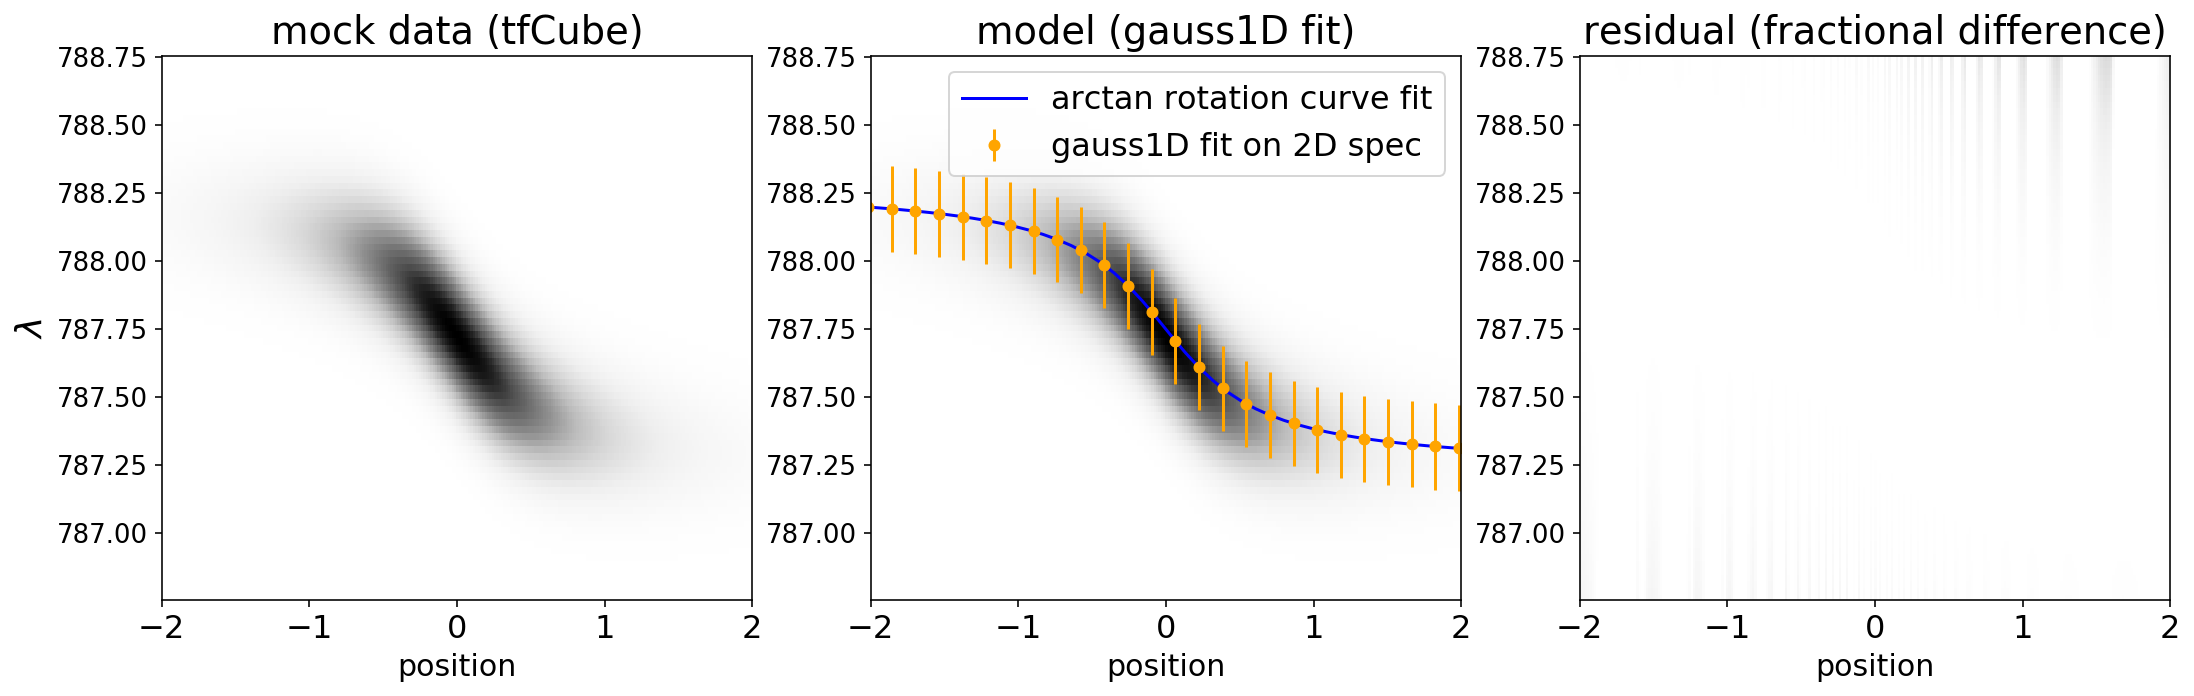

In [24]:
#%matplotlib
%matplotlib inline

ncol=3

fig,ax = plt.subplots(1,ncol,figsize=(18,5))
plt.rc('font',size=16)

ax[0].imshow(data.T ,extent=[x_min, x_MAX, lambda_min, lambda_MAX ]       , aspect='auto',cmap='Greys',vmin=0)
ax[1].imshow(model.T,extent=[x_min, x_MAX, lambda_min, lambda_MAX ]       , aspect='auto',cmap='Greys',vmin=0)
ax[2].imshow((data.T-model.T)/data.T,extent=[x_min, x_MAX, lambda_min, lambda_MAX ], aspect='auto',cmap='Greys',vmin=0)

#ax[1].plot(GaussFit.peak_info_exact['peak_loc'][::6]         ,np.flip(GaussFit.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none',label='image peak (exact)')
#ax[1].plot(GaussFit.fitted_rot_lambdaObs[2::6],np.flip(GaussFit.grid_pos)[2::6],color='orange', marker='d', markersize=5,ls='none',mfc='none',label='bestfit rot lambdaObs based on peakLambda')
#ax[1].plot(fid_rot_lambda_peak[5::6],np.flip(GaussFit.grid_pos)[5::6],color='lightblue', marker='*', markersize=5,ls='none',label='fiducial')
ax[1].errorbar(np.flip(GaussFit.grid_pos)[3::10], fitted_peakLambda[3::10], fitted_sigma[3::10] ,color='orange', marker='o', markersize=5,ls='none',label='gauss1D fit on 2D spec')
ax[1].plot(np.flip(GaussFit.grid_pos)[5::6],RotFit.fitted_rot_lambdaObs[5::6],color='b',ls='-',label='arctan rotation curve fit')



#ax[2].plot(peak_info['peak_loc'][::6],np.flip(GaussFit.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none')
#ax[2].plot(fitted_peakLoc[3::6]       ,np.flip(GaussFit.grid_pos)[3::6],color='blue', marker='^', markersize=5,ls='none')
#ax[2].plot(GaussFit.approxFit_rot_lambda_peak[2::6],np.flip(GaussFit.grid_pos)[2::6],color='orange', marker='d', markersize=5,ls='none',mfc='none')
#ax[2].plot(fid_rot_lambda_peak[5::6],np.flip(GaussFit.grid_pos)[5::6],color='lightblue', marker='*', markersize=5,ls='none')

vcen = data_info['lambda_emit']*(1.+data_info['par_fid']['redshift'])

for j in range(ncol):
#    ax[j].axhline(y=0.0,color='white', linestyle='-',lw=1)
#    ax[j].axhline(y=0.5,color='white', linestyle=':',lw=1)
#    ax[j].axhline(y=-0.5,color='white', linestyle=':',lw=1)
#    ax[j].axvline(x=vcen,color='white', linestyle='-',lw=1)
    
    ax[j].set_ylim(vcen-1.0,vcen+1.0)
    ax[j].set_xlim(-2,2)
    ax[j].set_xlabel('position', fontsize=15)
    ax[j].tick_params(axis='x', labelsize=16)
    ax[j].tick_params(axis='y', labelsize=13)

ax[0].set_ylabel(r'$\lambda$', fontsize=18)    
ax[0].set_title('mock data (tfCube)')
ax[1].set_title('model (gauss1D fit)')
ax[2].set_title('residual (fractional difference)')

#ax[1].legend(loc=(2.3,0.75),prop={'size':16})
ax[1].legend(loc="best",prop={'size':16})

plt.show()

In [13]:
fitted_sigma

array([ 0.15804049,  0.15807253,  0.15810267,  0.1581308 ,  0.15815682,
        0.15818062,  0.15820208,  0.15822106,  0.15823744,  0.15825109,
        0.15826187,  0.15826962,  0.15827419,  0.15827542,  0.15827315,
        0.15826721,  0.1582574 ,  0.15824354,  0.15822543,  0.15820287,
        0.15817565,  0.15814355,  0.15810633,  0.15806375,  0.15801558,
        0.15796154,  0.15790137,  0.1578348 ,  0.15780332,  0.15787512,
        0.15794236,  0.15800468,  0.15806174,  0.15811315,  0.15815853,
        0.15819745,  0.15822948,  0.15825416,  0.15827101, -0.15827952,
       -0.15827917, -0.15826939, -0.15824963, -0.15821926, -0.15817767,
       -0.15812419, -0.15805816, -0.15797885, -0.15788555,  0.15779868,
        0.15790626,  0.15800339,  0.15808806,  0.1581592 ,  0.15821567,
        0.15825631,  0.15827985, -0.15828501, -0.1582704 , -0.15823461,
       -0.15817617, -0.15809354, -0.15798514, -0.15784936, -0.15789075,
       -0.15802635, -0.15813667, -0.15821922, -0.15827141, -0.15

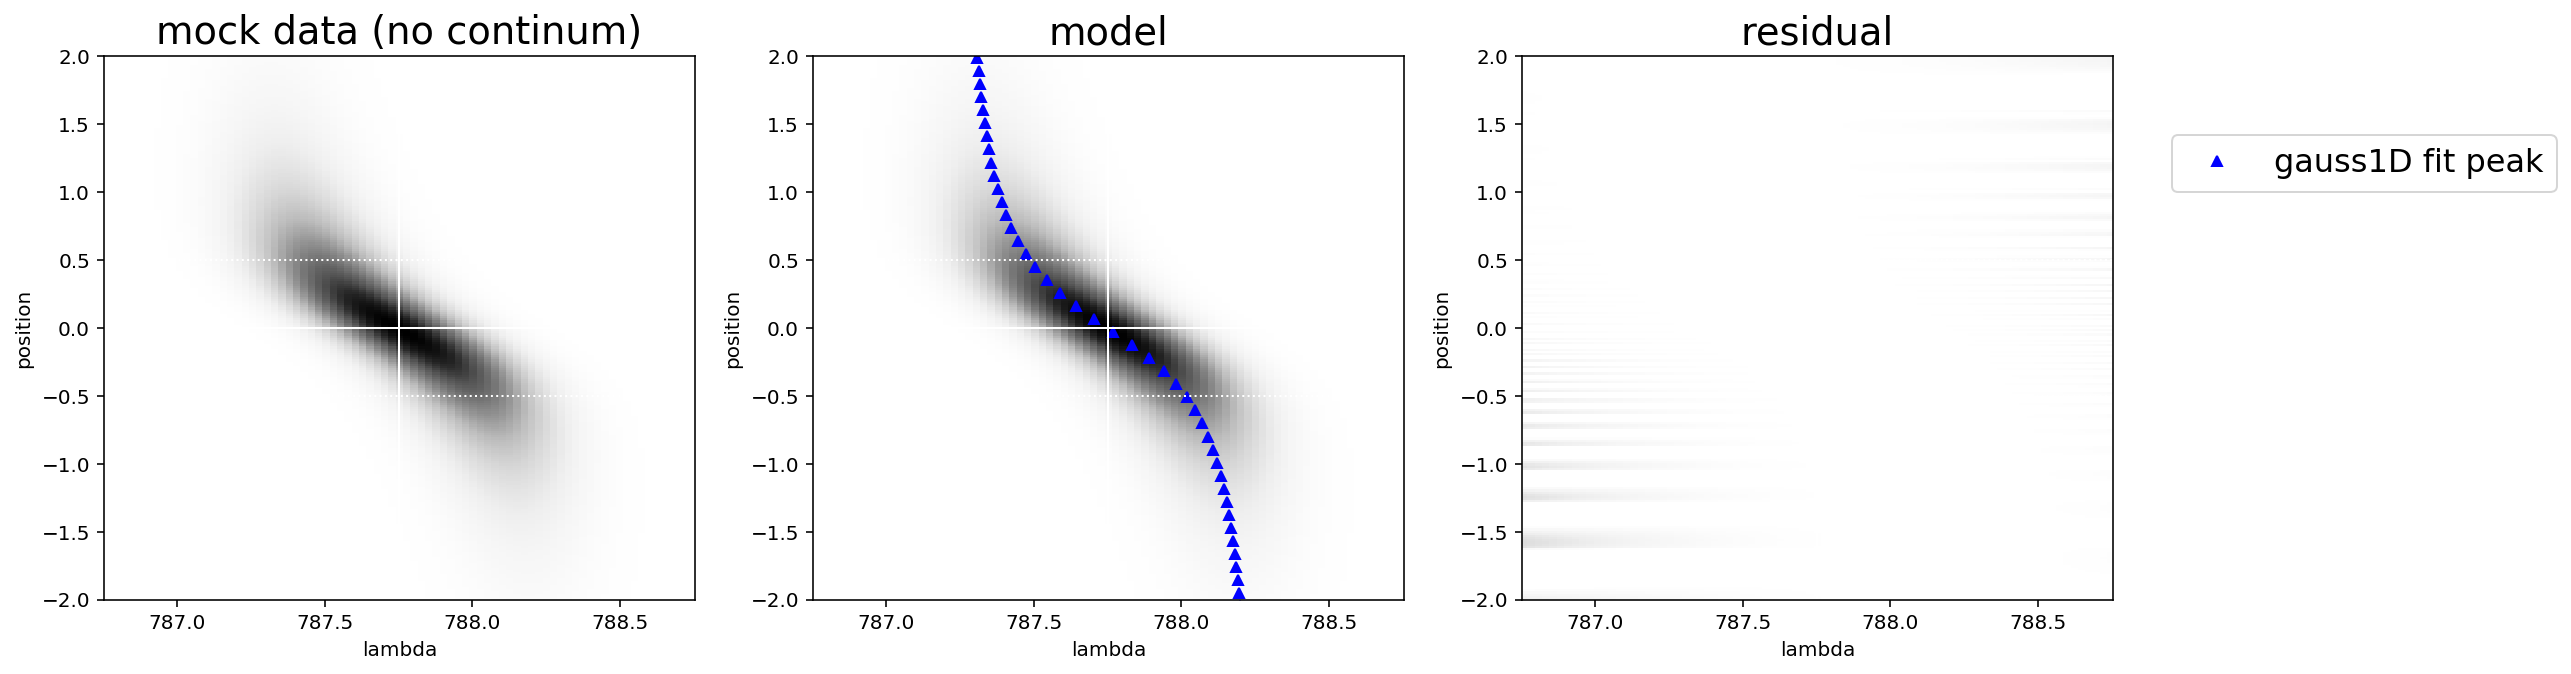

In [14]:
#%matplotlib
%matplotlib inline

ncol=3

fig,ax = plt.subplots(1,ncol,figsize=(18,5))
plt.rc('font',size=16)

ax[0].imshow(data ,extent=[lambda_min, lambda_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)
ax[1].imshow(model,extent=[lambda_min, lambda_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)
ax[2].imshow((data-model)/data,extent=[lambda_min, lambda_MAX, x_min, x_MAX ], aspect='auto',cmap='Greys',vmin=0)

#ax[1].plot(GaussFit.peak_info_exact['peak_loc'][::6]         ,np.flip(GaussFit.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none',label='image peak (exact)')
ax[1].plot(fitted_peakLambda[3::6]            ,np.flip(GaussFit.grid_pos)[3::6],color='blue', marker='^', markersize=5,ls='none',label='gauss1D fit peak')
#ax[1].plot(GaussFit.fitted_rot_lambdaObs[2::6],np.flip(GaussFit.grid_pos)[2::6],color='orange', marker='d', markersize=5,ls='none',mfc='none',label='bestfit rot lambdaObs based on peakLambda')
#ax[1].plot(fid_rot_lambda_peak[5::6],np.flip(GaussFit.grid_pos)[5::6],color='lightblue', marker='*', markersize=5,ls='none',label='fiducial')


#ax[2].plot(peak_info['peak_loc'][::6],np.flip(GaussFit.grid_pos)[::6],color='red', marker='o', markersize=5,ls='none')
#ax[2].plot(fitted_peakLoc[3::6]       ,np.flip(GaussFit.grid_pos)[3::6],color='blue', marker='^', markersize=5,ls='none')
#ax[2].plot(GaussFit.approxFit_rot_lambda_peak[2::6],np.flip(GaussFit.grid_pos)[2::6],color='orange', marker='d', markersize=5,ls='none',mfc='none')
#ax[2].plot(fid_rot_lambda_peak[5::6],np.flip(GaussFit.grid_pos)[5::6],color='lightblue', marker='*', markersize=5,ls='none')


vcen = data_info['lambda_emit']*(1.+data_info['par_fid']['redshift'])

for j in range(ncol):
    ax[j].axhline(y=0.0,color='white', linestyle='-',lw=1)
    ax[j].axhline(y=0.5,color='white', linestyle=':',lw=1)
    ax[j].axhline(y=-0.5,color='white', linestyle=':',lw=1)
    ax[j].axvline(x=vcen,color='white', linestyle='-',lw=1)
    
    ax[j].set_xlim(vcen-1.0,vcen+1.0)
    ax[j].set_ylim(-2,2)
    ax[j].set_xlabel('lambda')
    ax[j].set_ylabel('position')
    
ax[0].set_title('mock data (no continum)')
ax[1].set_title('model')
ax[2].set_title('residual')

ax[1].legend(loc=(2.3,0.75),prop={'size':16})

plt.show()

NameError: name 'fit_tool' is not defined

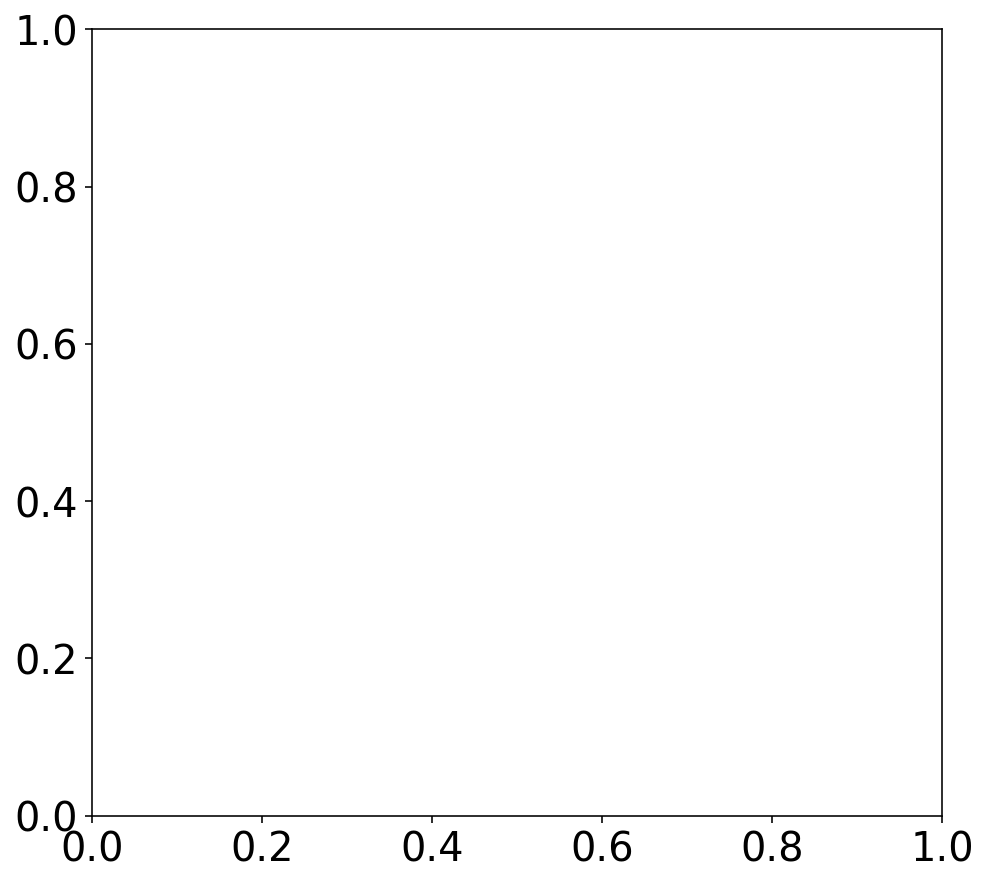

In [15]:
fig = plt.figure(figsize=(7.2,6.5))
plt.rc('font',size=20)

ax1=fig.add_axes([0.16,0.11,0.82,0.84])

ax1.plot(fit_tool.grid_pos,fid_rot_v_peak-v_sys0,label='fiducial',color='lightblue')
ax1.plot(fit_tool.grid_pos,v_image_peak,label='image peak',color='red')
ax1.plot(fit_tool.grid_pos,v_image_peak,label='gauss1D bestfit peak',color='blue',ls="-.")
ax1.plot(fit_tool.grid_pos,fit_tool.approxFit_rot_v_peak-v_sys0,label='bestfit rot curve',color='orange',lw=2)


ax1.set_xlabel('position')
ax1.set_ylabel('velocity')

ax1.legend(loc='best',prop={'size':18})

In [ ]:
%matplotlib inline
plt.imshow(data_info['data'],cmap=plt.cm.Greys,origin="lower")